# 0.

In [34]:
import sys, os
sys.path.append(os.pardir)

import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

import numpy as np
from collections import OrderedDict

from common.optimizer import *
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer
from common.util import shuffle_dataset

In [35]:
def load_mnist(normalize=True, one_hot_label=False):
    def _change_one_hot_label(X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1
            
        return T

    def train_test_split(data, target, test_size, seed=1004):
        import numpy as np
        
        test_num = int(data.shape[0] * test_size)
        train_num = data.shape[0] - test_num

        np.random.seed(seed)
        shuffled = np.random.permutation(data.shape[0])
        data = data[shuffled,:]
        target = target[shuffled]
        
        x_train = data[:train_num]
        x_test = data[train_num:]
        t_train = target[:train_num]
        t_test = target[train_num:]

        return x_train, x_test, t_train, t_test

    data = load_digits().data
    target = load_digits().target
    

    x_train, x_test, t_train, t_test = train_test_split(data, target, test_size=0.2)
    if normalize:
        x_train = x_train / 16.
        x_test = x_test / 16.

    if one_hot_label:
        t_train = _change_one_hot_label(t_train)
        t_test = _change_one_hot_label(t_test)  

    return (x_train, t_train), (x_test, t_test)


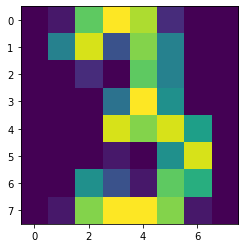

In [36]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
plt.imshow(x_train[random.randint(0, x_train.shape[0])].reshape(8, 8))
plt.show()

# 1.

In [37]:
def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

In [38]:
init_pos = (7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

In [39]:
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.7)
optimizers["Momentum"] = Momentum(lr=0.05)
optimizers["AdaGrad"] = AdaGrad(lr=0.75)
optimizers["Adam"] = Adam(lr=0.5)
optimizers["RMSprop"] = RMSprop(lr = 0.1)

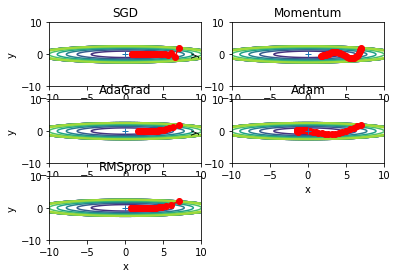

In [40]:
idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

# 2.

In [46]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [47]:
optimizers = {}
optimizers['SGD'] = SGD(lr=0.02)
optimizers['Momentum'] = Momentum(lr=0.02)
optimizers['AdaGrad'] = AdaGrad(lr=0.02)
optimizers['Adam'] = Adam(lr=0.002)
optimizers['RMSprop'] = RMSprop(lr=0.02)

In [48]:
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=64, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

In [49]:
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.3148993872551067
Momentum:2.3404612195520103
AdaGrad:2.2653154238721607
Adam:2.077736061939827
RMSprop:13.570209852627336
===========iteration:100===========
SGD:0.4493794310290891
Momentum:0.07583712524600275
AdaGrad:0.014776796981394984
Adam:0.0350694861243575
RMSprop:0.18136705588081092
===========iteration:200===========
SGD:0.250974471006193
Momentum:0.026528255107016976
AdaGrad:0.003495400663444405
Adam:0.004421215612208456
RMSprop:0.12652731318150806
===========iteration:300===========
SGD:0.1341436776996089
Momentum:0.007992306448661543
AdaGrad:0.0013643882276658113
Adam:0.0014350676636222187
RMSprop:0.41862365249227396
===========iteration:400===========
SGD:0.12230396129043053
Momentum:0.007056361874014342
AdaGrad:0.0012902153984452956
Adam:0.0008532445368012549
RMSprop:1.4042782025569438
===========iteration:500===========
SGD:0.07103584848051359
Momentum:0.0033492957383639407
AdaGrad:0.001000812802785779
Adam:0.00038926762274809555
RM

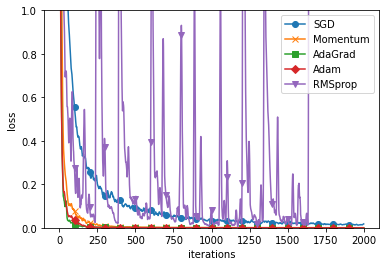

In [50]:
# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D", "RMSprop": "v"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# 3.

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def ReLU(x):
    return np.maximum(0, x)
def tanh(x):
    return np.tanh(x)

In [18]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

In [19]:
x = input_data

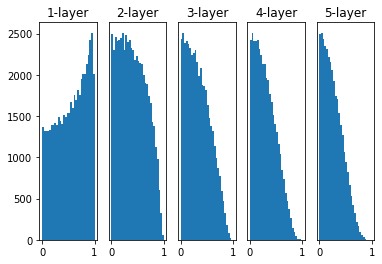

In [20]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 4.

In [51]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [52]:
# 1. 실험용 설정==========
weight_init_types = {'std=0.1': 0.1, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.1)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=64, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [53]:
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.1:2.292878981790812
Xavier:2.293043027822331
He:2.210964002189588
===========iteration:100===========
std=0.1:0.6279794865397257
Xavier:0.6007199595557275
He:0.1597903740721409
===========iteration:200===========
std=0.1:0.07381085036057781
Xavier:0.08180233755443854
He:0.03343894998867699
===========iteration:300===========
std=0.1:0.13346083984111146
Xavier:0.08039126350612322
He:0.03117490156591232
===========iteration:400===========
std=0.1:0.027328617717990875
Xavier:0.02892427124289376
He:0.015722267375782153
===========iteration:500===========
std=0.1:0.03510961286500569
Xavier:0.035587653798922356
He:0.018091055456039413
===========iteration:600===========
std=0.1:0.03231257210206933
Xavier:0.027730152382742387
He:0.012841718721492203
===========iteration:700===========
std=0.1:0.016406491066166318
Xavier:0.02567002720738104
He:0.01041079025456567
===========iteration:800===========
std=0.1:0.01340115513500329
Xavier:0.014366894883802446


KeyboardInterrupt: 

In [ ]:
# 3. 그래프 그리기==========
markers = {'std=0.1': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 5.

In [22]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=64, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

In [23]:
grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.055812000626165315
W3:0.0
b3:1.7990380059285105e-07


# 6.

In [118]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

In [119]:
max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [120]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=64, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=64, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.107 - 0.089
..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
epoch:1 | 0.107 - 0.144
epoch:2 | 0.107 - 0.17
epoch:3 | 0.107 - 0.228
epoch:4 | 0.107 - 0.249
epoch:5 | 0.107 - 0.286
epoch:6 | 0.107 - 0.307
epoch:7 | 0.107 - 0.331
epoch:8 | 0.107 - 0.355
epoch:9 | 0.107 - 0.371
epoch:10 | 0.107 - 0.389
epoch:11 | 0.107 - 0.414
epoch:12 | 0.107 - 0.447
epoch:13 | 0.107 - 0.455
epoch:14 | 0.107 - 0.469
epoch:15 | 0.107 - 0.49
epoch:16 | 0.107 - 0.508
epoch:17 | 0.107 - 0.515
epoch:18 | 0.107 - 0.532
No handles with labels found to put in legend.
epoch:19 | 0.107 - 0.544
============== 2/16 ==============
epoch:0 | 0.092 - 0.098
epoch:1 | 0.107 - 0.087
..\common\functions.py:34: Run

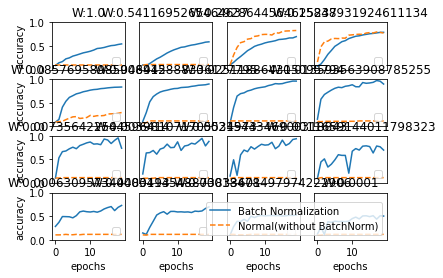

In [121]:
# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
 
plt.show()

# 7.

In [122]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [123]:
# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
# weight_decay_lambda = 0.1

In [124]:
network = MultiLayerNet(input_size=64, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [125]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.10666666666666667, test acc:0.1063
epoch:1, train acc:0.14, test acc:0.1412
epoch:2, train acc:0.22, test acc:0.1684
epoch:3, train acc:0.20666666666666667, test acc:0.1853
epoch:4, train acc:0.24, test acc:0.2078
epoch:5, train acc:0.27666666666666667, test acc:0.2332
epoch:6, train acc:0.31666666666666665, test acc:0.2621
epoch:7, train acc:0.36333333333333334, test acc:0.299
epoch:8, train acc:0.36333333333333334, test acc:0.3085
epoch:9, train acc:0.39, test acc:0.3418
epoch:10, train acc:0.45, test acc:0.378
epoch:11, train acc:0.45, test acc:0.4009
epoch:12, train acc:0.53, test acc:0.4555
epoch:13, train acc:0.56, test acc:0.4764
epoch:14, train acc:0.5566666666666666, test acc:0.4945
epoch:15, train acc:0.6366666666666667, test acc:0.5461
epoch:16, train acc:0.65, test acc:0.578
epoch:17, train acc:0.6966666666666667, test acc:0.5953
epoch:18, train acc:0.6766666666666666, test acc:0.5895
epoch:19, train acc:0.73, test acc:0.614
epoch:20, train acc:0.74, te

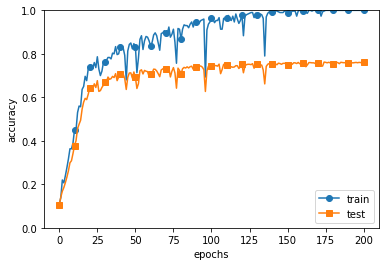

In [126]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 8.

In [135]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [136]:
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2

In [137]:
network = MultiLayerNetExtend(input_size=64, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=601, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list


58 ===
train loss:0.6112036667291022
train loss:0.7181999093535357
train loss:0.7487972986494357
=== epoch:470, train acc:0.74, test acc:0.6487 ===
train loss:0.6810466669451796
train loss:0.6995404824763729
train loss:0.7706253105071802
=== epoch:471, train acc:0.7433333333333333, test acc:0.6582 ===
train loss:0.8378936376775181
train loss:0.7660497477714627
train loss:0.6930813748090644
=== epoch:472, train acc:0.7466666666666667, test acc:0.6547 ===
train loss:0.7064249368357752
train loss:0.6820199375384477
train loss:0.7247055460190542
=== epoch:473, train acc:0.7533333333333333, test acc:0.6712 ===
train loss:0.7121457116702977
train loss:0.777822466494639
train loss:0.7438856350783141
=== epoch:474, train acc:0.7566666666666667, test acc:0.6629 ===
train loss:0.768305517617392
train loss:0.7010499939130148
train loss:0.7091842522506728
=== epoch:475, train acc:0.73, test acc:0.6526 ===
train loss:0.7610833647618
train loss:0.7341680797254113
train loss:0.659499437679097
=== epo

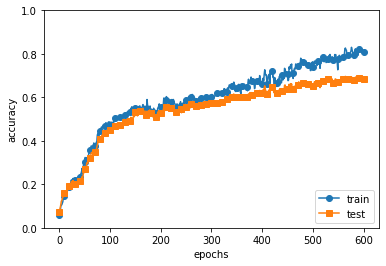

In [138]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 9.

In [163]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [164]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=64, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [157]:
# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.32 | lr:0.000561896679993351, weight decay:1.4381787592610407e-06
val acc:0.14 | lr:2.2234542167598615e-05, weight decay:2.084486073647257e-06
val acc:0.09 | lr:0.00024833183643810673, weight decay:1.4611511298431247e-07
val acc:0.18 | lr:0.00023069160005647528, weight decay:6.0154569803451605e-06
val acc:0.74 | lr:0.006198177443058704, weight decay:1.5951064172910767e-08
val acc:0.12 | lr:1.6128194110716008e-05, weight decay:3.93703473235913e-05


KeyboardInterrupt: 

In [ ]:
# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

In [165]:
def find_num(num):
    answer = 0
    if 1 <= num < 10:
        return answer
    elif num < 1:
        answer -= 1
        answer *= 10
    elif num >= 10:
        answer += 1
        answer /= 10

In [169]:
optimization_trial = 30

weight_decay_min = -8
weight_decay_max = -4
lr_min = -6
lr_max = -2


for a in range(3):
    weight_decay_bests = []
    lr_bests = []

    results_val = {}
    results_train = {}
    for _ in range(optimization_trial):
        # 탐색한 하이퍼파라미터의 범위 지정===============
        weight_decay = 10 ** np.random.uniform(weight_decay_min, weight_decay_max)
        lr = 10 ** np.random.uniform(lr_min, lr_max)
        # ================================================

        val_acc_list, train_acc_list = __train(lr, weight_decay)
        print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
        # key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
        key = (lr, weight_decay)

        results_val[key] = val_acc_list
        results_train[key] = train_acc_list

    # 그래프 그리기========================================================
    print("=========== Hyper-Parameter Optimization Result ===========")
    graph_draw_num = 20
    col_num = 5
    row_num = int(np.ceil(graph_draw_num / col_num))
    i = 0

    for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
        print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + "lr:" + str(key[0]) + ", weight decay:" + str(key[1]))
        if (i < 6):
            weight_decay_bests.append(key[0])
            lr_bests.append(key[1])

        plt.subplot(row_num, col_num, i+1)
        plt.title("Best-" + str(i+1))
        plt.ylim(0.0, 1.0)
        if i % 5: plt.yticks([])
        plt.xticks([])
        x = np.arange(len(val_acc_list))
        plt.plot(x, val_acc_list)
        plt.plot(x, results_train[key], "--")
        i += 1

        if i >= graph_draw_num:
            break

    plt.show()

    weight_decay_min = find_num(min(weight_decay_bests))
    weight_decay_max = find_num(max(weight_decay_bests)) + 1
    lr_min = find_num(min(lr_bests))
    lr_max = find_num(max(lr_bests)) + 1

    print("weight decay min:",weight_decay_min, ", weight decay max:", weight_decay_max, ", lr min:", lr_min, ", lr max:", lr_max)



val acc:0.09 | lr:0.00040025457421141665, weight decay:6.522887036075849e-05
val acc:0.12 | lr:0.0001571672046803762, weight decay:1.6691391489374643e-05
val acc:0.18 | lr:3.592479274723519e-05, weight decay:5.541960719150902e-07
val acc:0.28 | lr:0.0012709076777641147, weight decay:1.4383994161357478e-05
val acc:0.33 | lr:0.0013172965706228555, weight decay:1.8500524180608176e-05
val acc:0.11 | lr:6.647360322646732e-05, weight decay:2.4238872757257188e-08
val acc:0.58 | lr:0.0022658668785597476, weight decay:2.148832909960878e-08
val acc:0.27 | lr:0.0004332451524873956, weight decay:3.5243204321645497e-07
val acc:0.09 | lr:8.83676057878779e-05, weight decay:1.7008865298632945e-06


KeyboardInterrupt: 